In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import tqdm

import metagames.functional as mf

In [2]:
default_agent_config = {
    'num_parameters': 10,
    'opponent_num_parameters': 10,
    'initializer': 'scaled_normal',
    'loss': 'utility',
    'optimizer': 'grad',
    'learning_rate': 1e-1,
    'step_rate': 1,
    'num_players': 1,
}

In [3]:
opponents = [
    {
        'agent': 'selfish',
        'num_parameters': 1,
        'name': 'selfish',
    },
    {
        'agent': 'linear',
        'num_parameters': 10,
        'name': 'copy',
        'loss': 'copy',
    },
    *[
        {
            'agent': 'linear',
            'num_parameters': n,
            'name': 'lin{:d}'.format(n)
        } for n in [1, 2, 3, 10, 100] 
    ]
]

In [4]:
stats = {}

a1_num_params = 10
for opponent in tqdm.tqdm(opponents):
    data = mf.main.run_experiment(
        experiment='duel',
        game='prisoners_dilemma',
        num_steps=5000,
        agents_config=[
            {'agent': 'linear',
             'num_parameters': a1_num_params,
             'num_opponent_parameters': opponent['num_parameters'],
             'name': '{:s}_base'.format(opponent['name'])},
            {'num_opponent_parameters': a1_num_params,
             **opponent,
             'name': '{:s}_agent'.format(opponent['name'])}
        ],
        default_agent_config=default_agent_config,
        agent_seed=1,
        parameter_seed=2,
    )
    stats.update(mf.data.experiment_step_statistics(data))

100%|██████████| 7/7 [01:43<00:00, 15.09s/it]


In [5]:
def plot(step_statistics, title=None, key='utility', logy=False):
    ax = plt.gca()
    if logy:
        plt_fn = plt.semilogy
    else:
        plt_fn = plt.plot
    for player, player_stats in step_statistics.items():
        plt_fn(player_stats[key]['mean'], label=player)

    ax.legend()
    ax.set_ylabel(key)
    ax.set_xlabel('Global Step')
    if title is not None:
        ax.set_title(title)

In [16]:
def run_plots(stats, agent_prefix):
    plt.figure(figsize=(16, 8))
    data = {key: value for key, value in stats.items() if key.startswith(agent_prefix)}
    plt.subplot(2, 2, 1)
    plot(data, key='utility')
    plt.subplot(2, 2, 2)
    plot(data, key='action_probability')
    plt.subplot(2, 2, 3)
    plot(data, key='grad_norm', logy=True)

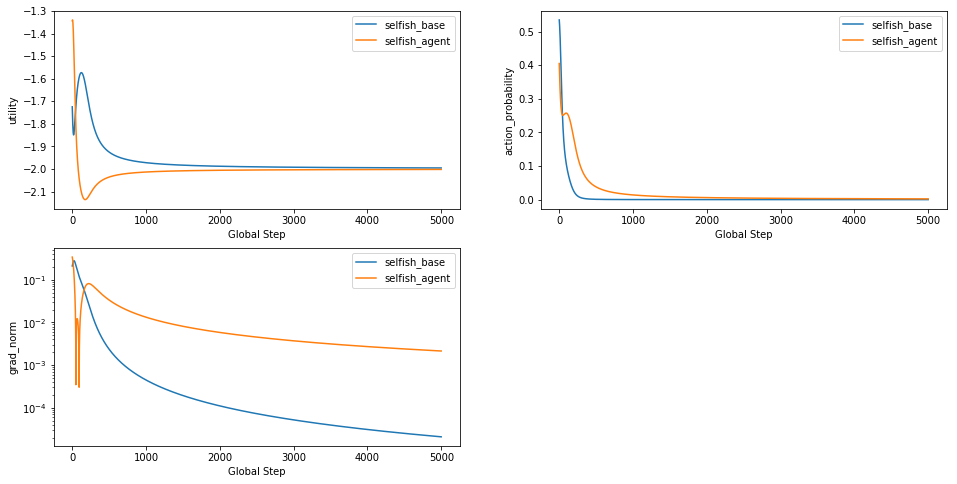

In [17]:
run_plots(stats, 'selfish')

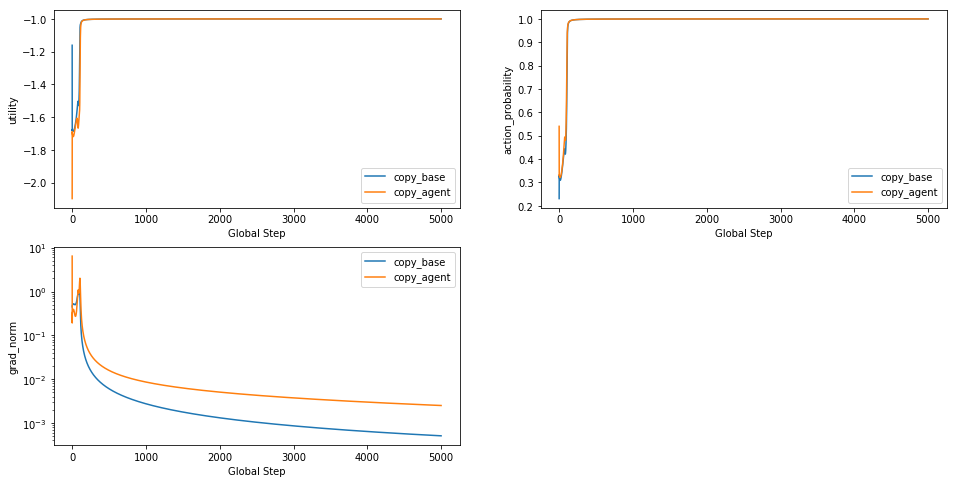

In [18]:
run_plots(stats, 'copy')

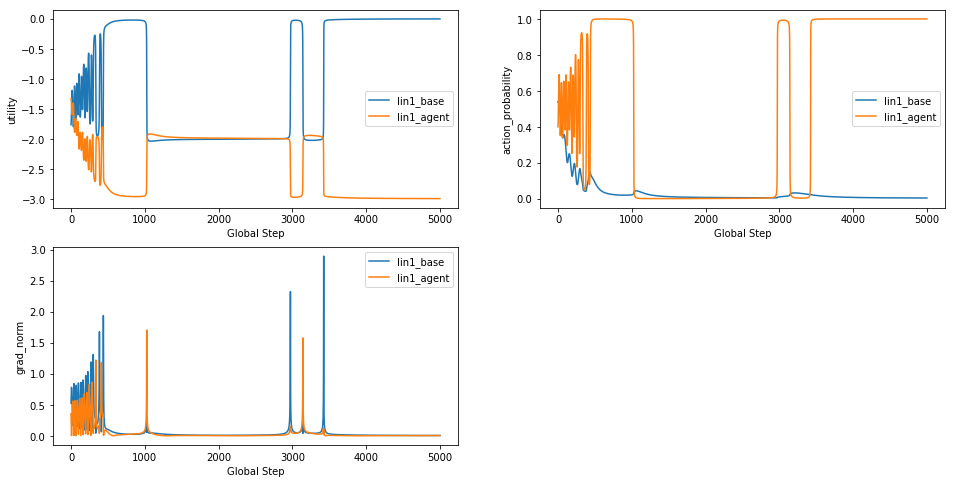

In [15]:
run_plots(stats, 'lin1_')

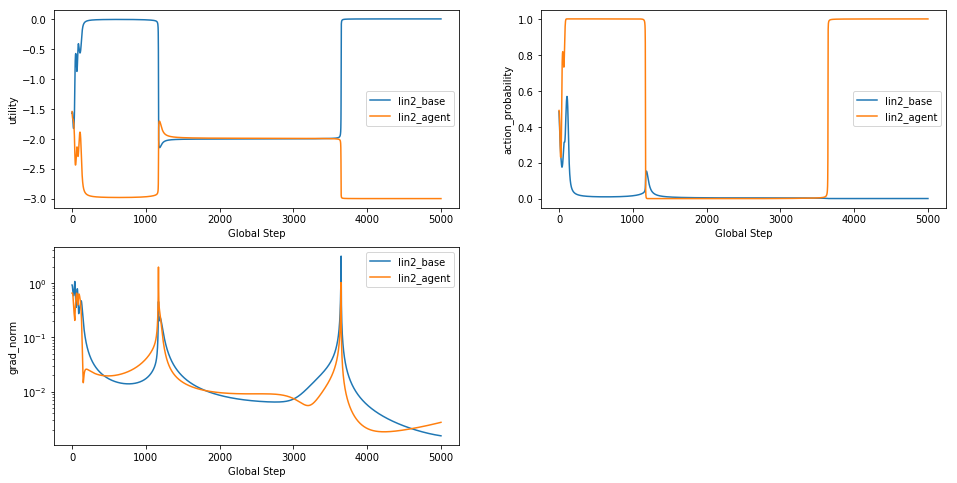

In [10]:
run_plots(stats, 'lin2_')

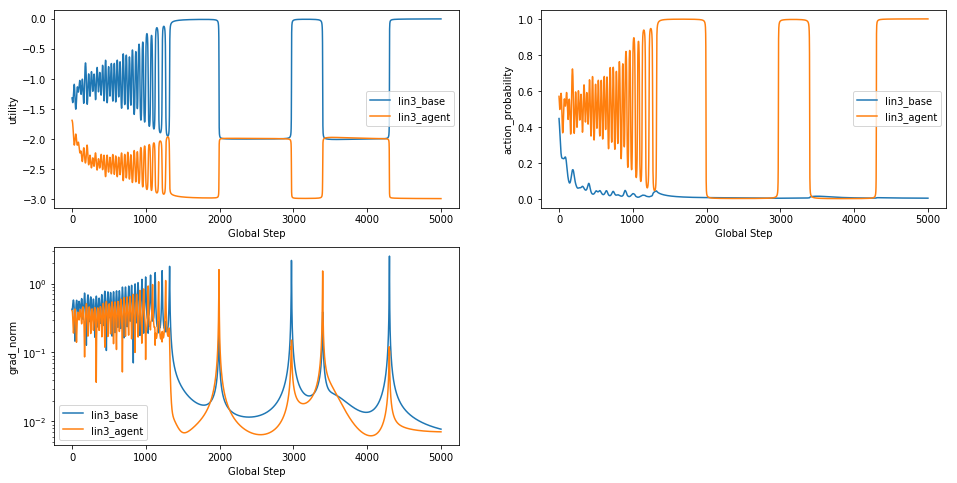

In [11]:
run_plots(stats, 'lin3_')

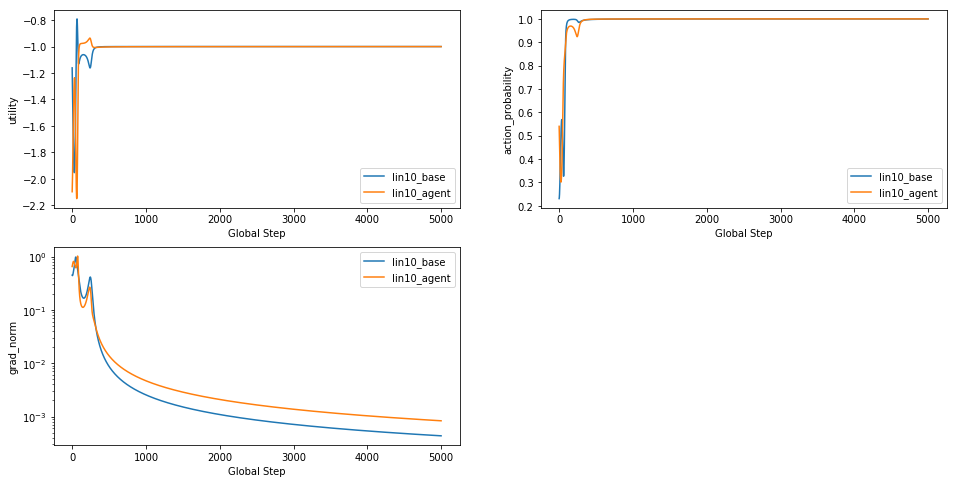

In [12]:
run_plots(stats, 'lin10_')

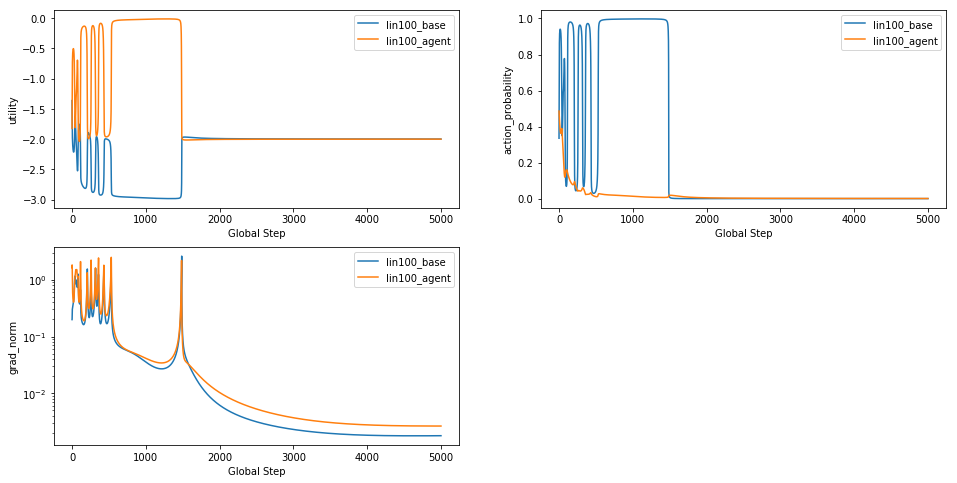

In [13]:
run_plots(stats, 'lin100_')